In [1]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt

from backend.company import Company
from backend.risk import Risk

### 1. Define risks

In [3]:
test = (1, 2, 3,4, 5)

for te in test:
    print(te)

1
2
3
4
5


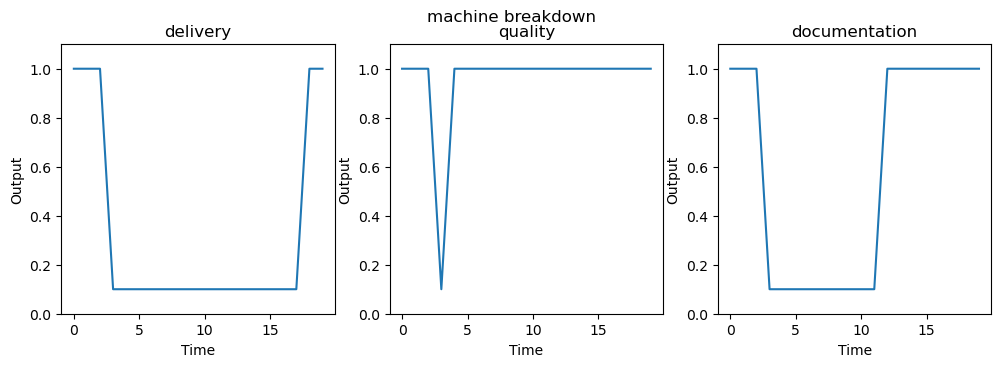

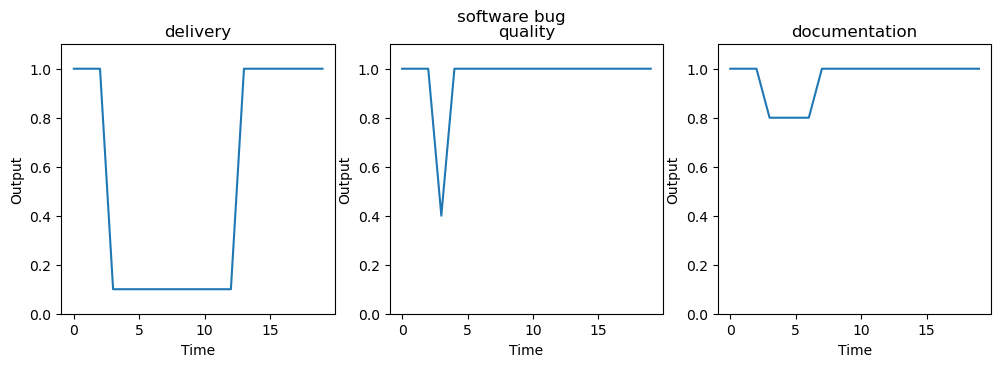

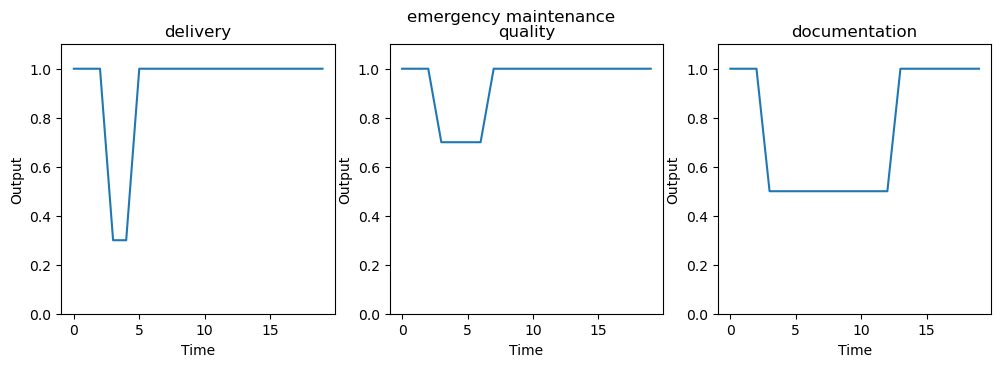

In [4]:
def get_disruptions(disruptions):
    return [
        {'type': 'delivery', 'disruption_type': disruptions[0][0], 'low': disruptions[0][1], 'interval': disruptions[0][2]},
        {'type': 'quality', 'disruption_type': disruptions[1][0], 'low': disruptions[1][1], 'interval': disruptions[1][2]},
        {'type': 'documentation', 'disruption_type': disruptions[2][0], 'low': disruptions[2][1], 'interval': disruptions[2][2]}
    ]


risks_params = {
    'machine_breakdown': {'name': 'machine breakdown', 'description': 'tooling jam', 'probability': 0.01,
                          'disruptions': get_disruptions([['u', 0.1, 15],
                                                          ['u', 0.1, 1],
                                                          ['u', 0.1, 9]])},
    'software_bug': {'name': 'software bug', 'description': 'lifecycle system fail', 'probability': 0.03,
                     'disruptions': get_disruptions([['u', 0.1, 10],
                                                     ['u', 0.4, 1],
                                                     ['u', 0.8, 4]])},
    'emergency_maintenance': {'name': 'emergency maintenance', 'description': 'cooling system overflow',
                              'probability': 0.05,
                              'disruptions': get_disruptions([['u', 0.3, 2],
                                                              ['u', 0.7, 4],
                                                              ['u', 0.5, 10]])},
        'emergency_maintenance': {'name': 'emergency maintenance', 'description': 'cooling system overflow',
                              'probability': 0.05,
                              'disruptions': get_disruptions([['u', 0.3, 2],
                                                              ['u', 0.7, 4],
                                                              ['u', 0.5, 10]])},
}

for i, risk_key in enumerate(risks_params, 0):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3.5))
    risk = Risk(risks_params[risk_key])
    display_tensor = risk.display((1, 20))
    fig.suptitle(risk.name)
    for j, prop_type_tensor in enumerate(display_tensor, 0):
        axes[j].plot(prop_type_tensor[0])
        axes[j].set_ylim([0, 1.1])
        axes[j].set_title(risk.name)
        axes[j].set_ylabel('Output')
        axes[j].set_xlabel('Time')

        match j:
            case 0: axes[j].set_title('delivery')
            case 1: axes[j].set_title('quality')
            case 2: axes[j].set_title('documentation')

plt.show()


### 1. Define Risks